# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
units = "imperial"

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
name = []
lng = []
lat = []
maxtemp = []
humid = []
cloud = []
windspd = []
country = []
datetime = []

city_number = 0
set_num = 1

for city in cities:
    q_url = f"{base_url}q={city}&units={units}&appid={weather_api_key}"
    weather_resp = requests.get(q_url).json()

    try:
        city_number += 1
        
        name.append(weather_resp['name'])
        lng.append(weather_resp['coord']['lon'])
        lat.append(weather_resp['coord']['lat'])
        maxtemp.append(weather_resp['main']['temp_max'])
        humid.append(weather_resp['main']['humidity'])
        cloud.append(weather_resp['clouds']['all'])
        windspd.append(weather_resp['wind']['speed'])
        country.append(weather_resp['sys']['country'])
        datetime.append(weather_resp['dt'])
        

        print(f"Processing Record {city_number} of Set {set_num} | {city}")


    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    if city_number == 50:
        set_num += 1
        city_number = 0

Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | aksay
Processing Record 5 of Set 1 | jiwani
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tabou
Processing Record 8 of Set 1 | huron
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | maningrida
City not found. Skipping...
Processing Record 12 of Set 1 | lamu
City not found. Skipping...
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | kalangala
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | avarua
Processing Record 24 of Set 1 | vila
Processing Record 25 of Set 1 | castro
Processing Record 26 of 

Processing Record 6 of Set 5 | dicabisagan
Processing Record 7 of Set 5 | lewisporte
Processing Record 8 of Set 5 | mao
Processing Record 9 of Set 5 | buckeye
Processing Record 10 of Set 5 | belyy yar
Processing Record 11 of Set 5 | souillac
Processing Record 12 of Set 5 | san patricio
Processing Record 13 of Set 5 | shache
Processing Record 14 of Set 5 | oron
Processing Record 15 of Set 5 | vao
Processing Record 16 of Set 5 | talnakh
Processing Record 17 of Set 5 | botucatu
Processing Record 18 of Set 5 | mahajanga
Processing Record 19 of Set 5 | lagoa
Processing Record 20 of Set 5 | poum
Processing Record 21 of Set 5 | lompoc
Processing Record 22 of Set 5 | klaksvik
Processing Record 23 of Set 5 | saint anthony
Processing Record 24 of Set 5 | hofn
Processing Record 25 of Set 5 | tuatapere
Processing Record 26 of Set 5 | colchester
Processing Record 27 of Set 5 | korla
Processing Record 28 of Set 5 | cravo norte
Processing Record 29 of Set 5 | trelew
Processing Record 30 of Set 5 | pu

Processing Record 10 of Set 9 | malakal
Processing Record 11 of Set 9 | zhigansk
Processing Record 12 of Set 9 | santa vitoria do palmar
Processing Record 13 of Set 9 | birao
Processing Record 14 of Set 9 | cabo san lucas
Processing Record 15 of Set 9 | gumdag
City not found. Skipping...
Processing Record 17 of Set 9 | garut
Processing Record 18 of Set 9 | akdepe
Processing Record 19 of Set 9 | thinadhoo
Processing Record 20 of Set 9 | port lincoln
Processing Record 21 of Set 9 | brae
Processing Record 22 of Set 9 | baykit
Processing Record 23 of Set 9 | palu
Processing Record 24 of Set 9 | mildura
Processing Record 25 of Set 9 | muroto
Processing Record 26 of Set 9 | wanning
Processing Record 27 of Set 9 | zhezkazgan
Processing Record 28 of Set 9 | vrangel
Processing Record 29 of Set 9 | mojo
Processing Record 30 of Set 9 | komsomolskiy
Processing Record 31 of Set 9 | talas
City not found. Skipping...
Processing Record 33 of Set 9 | te anau
Processing Record 34 of Set 9 | faya
Process

In [6]:
city_summary = pd.DataFrame({"City Name": name,
                            "Longitude": lng,
                            "Latitude": lat,
                            "Max Temperature": maxtemp,
                            "Humidtiy": humid,
                            "Cloud Coverage": cloud,
                            "Wind Speed": windspd,
                            "City Country": country,
                            "Date Time": datetime})
city_summary.head()

,City Name,Longitude,Latitude,Max Temperature,Humidtiy,Cloud Coverage,Wind Speed,City Country,Date Time
0,Lebu,-73.65,-37.62,54.18,95,100,22.66,CL,1594357095
1,Iqaluit,-68.51,63.75,44.60,87,75,4.70,CA,1594357134
2,Rikitea,-134.97,-23.12,66.94,71,20,20.74,PF,1594357079
3,Aksay,39.87,47.26,68.00,60,0,8.95,RU,1594357110
4,Jiwani,61.74,25.05,88.83,69,37,4.68,PK,1594357535


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Export csv
city_sum_output = city_summary.to_csv("../output_data/cities.csv", index=False)

In [9]:
city_sum_path = "../output_data/cities.csv"
city_sum_csv = pd.read_csv(city_sum_path)
city_sum_csv

,City Name,Longitude,Latitude,Max Temperature,Humidtiy,Cloud Coverage,Wind Speed,City Country,Date Time
0,Lebu,-73.65,-37.62,54.18,95,100,22.66,CL,1594357095
1,Iqaluit,-68.51,63.75,44.60,87,75,4.70,CA,1594357134
2,Rikitea,-134.97,-23.12,66.94,71,20,20.74,PF,1594357079
3,Aksay,39.87,47.26,68.00,60,0,8.95,RU,1594357110
4,Jiwani,61.74,25.05,88.83,69,37,4.68,PK,1594357535
...,...,...,...,...,...,...,...,...,...
557,Benguela,13.41,-12.58,64.56,82,0,1.25,AO,1594357157
558,Alcúdia,3.12,39.85,77.00,50,99,5.82,ES,1594357729
559,Morada Nova,-38.37,-5.11,72.18,89,96,3.18,BR,1594357729
560,Huilong,121.66,31.81,81.00,86,97,6.69,CN,1594357729


 this step if there are no cities that have humidity > 100%. 

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
city_sum_csv.describe()

,Longitude,Latitude,Max Temperature,Humidtiy,Cloud Coverage,Wind Speed,Date Time
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,15.913648,20.875676,68.845658,71.544484,52.181495,8.233025,1.594357e+09
std,88.399245,32.913112,13.978096,21.180718,38.253388,5.322147,2.735709e+02
min,-175.200000,-54.800000,26.600000,5.000000,0.000000,0.110000,1.594357e+09
25%,-61.170000,-6.152500,59.000000,62.000000,13.000000,4.635000,1.594357e+09
50%,20.800000,23.860000,70.510000,77.000000,57.000000,7.230000,1.594358e+09
75%,88.490000,47.645000,79.640000,87.000000,90.000000,10.290000,1.594358e+09
max,178.420000,78.220000,104.090000,100.000000,100.000000,31.850000,1.594358e+09


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

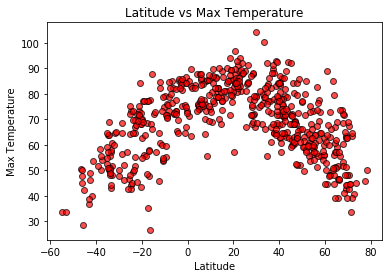

In [13]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Max Temperature"], marker="o", facecolors="red", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Max Temperature")
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

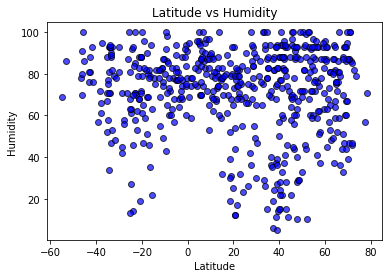

In [14]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Humidtiy"], marker="o", facecolors="blue", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

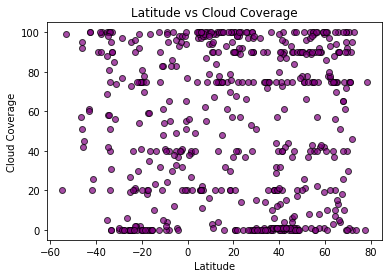

In [15]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Cloud Coverage"], marker="o", facecolors="purple", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Latitude vs Cloud Coverage")
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

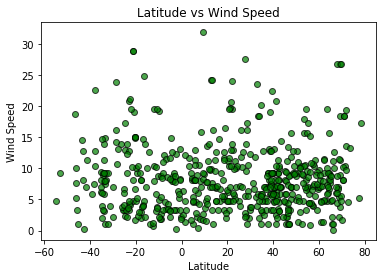

In [16]:
plt.scatter(city_sum_csv["Latitude"], city_sum_csv["Wind Speed"], marker="o", facecolors="green", edgecolors="black", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression